<a href="https://colab.research.google.com/github/corp-alt/SDS-PhD-2019-Portfolio---Dominic/blob/master/Day_4_Portfolio_(Dominic)_SDS_Ph_D_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: NLTK

In [0]:
text = "I’ve been called many things in my life, but never an optimist. That was fine by me. I believed pessimists lived in a constant state of pleasant surprise: if you always expected the worst, things generally turned out better than you imagined. The only real problem with pessimism, I figured, was that too much of it could accidentally turn you into an optimist."

In [6]:
import nltk #this part is needed on colab.
nltk.download('punkt')
nltk.download('stopwords')
#----------------------------------------

# Tokenizing sentences
from nltk.tokenize import sent_tokenize

# Tokenizing words
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Let's get our stences.
# Note that the full-stops at the end of each sentence are still there

sentences = sent_tokenize(text)
print(sentences)

['I’ve been called many things in my life, but never an optimist.', 'That was fine by me.', 'I believed pessimists lived in a constant state of pleasant surprise: if you always expected the worst, things generally turned out better than you imagined.', 'The only real problem with pessimism, I figured, was that too much of it could accidentally turn you into an optimist.']


In [8]:
# Use word_tokenize to tokenize the first sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[0])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(text))

print(tokenized_sent)
print(unique_tokens)

['I', '’', 've', 'been', 'called', 'many', 'things', 'in', 'my', 'life', ',', 'but', 'never', 'an', 'optimist', '.']
{'figured', 'out', ':', 'That', '.', 'called', 'believed', 'turn', '’', 'better', 'never', 'lived', 'state', 'constant', 'much', 'could', 'The', 'always', 've', 'worst', 'than', 'it', ',', 'only', 'of', 'pessimism', 'expected', 'generally', 'in', 'life', 'but', 'pessimists', 'into', 'things', 'an', 'the', 'been', 'turned', 'if', 'I', 'by', 'real', 'was', 'that', 'surprise', 'optimist', 'pleasant', 'you', 'a', 'imagined', 'problem', 'accidentally', 'me', 'many', 'fine', 'my', 'too', 'with'}


In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [10]:
[word.lower() for word in word_tokenize(text) if word not in stop_words and word.isalnum()]

['i',
 'called',
 'many',
 'things',
 'life',
 'never',
 'optimist',
 'that',
 'fine',
 'i',
 'believed',
 'pessimists',
 'lived',
 'constant',
 'state',
 'pleasant',
 'surprise',
 'always',
 'expected',
 'worst',
 'things',
 'generally',
 'turned',
 'better',
 'imagined',
 'the',
 'real',
 'problem',
 'pessimism',
 'i',
 'figured',
 'much',
 'could',
 'accidentally',
 'turn',
 'optimist']

## Exercise 2: Twitter ("Boomer")

In [0]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) #to see more text

import numpy as np
import seaborn as sns

import itertools
from collections import Counter

In [0]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [0]:
# download and open tweets

boomer_tweets_df = pd.read_json('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/tweets_boomer.zip')
boomer_tweets_df.head()

In [0]:
boomer_tweets_df = boomer_tweets_df.set_index(pd.to_datetime(boomer_tweets_df.created_at))

In [0]:
# Let's identify @
boomer_tweets_df['mentions'] = boomer_tweets_df['tweet'].map(lambda textline: [tag for tag in tknzr.tokenize(textline) if tag.startswith('@')])

In [180]:
boomer_tweets_df['mentions']

created_at
2019-11-21 20:28:24    []
2019-11-21 20:27:37    []
2019-11-21 20:26:11    []
2019-11-21 20:24:34    []
2019-11-21 20:23:54    []
                       ..
2019-11-11 13:12:53    []
2019-11-11 13:11:46    []
2019-11-11 13:09:38    []
2019-11-11 13:09:11    []
2019-11-11 13:06:11    []
Name: mentions, Length: 9722, dtype: object

In [0]:
# Only keep tweets where a mention i present
boomer_tweets_df = boomer_tweets_df[boomer_tweets_df['mentions'].map(len) > 0]

In [182]:
boomer_tweets_df['mentions']

created_at
2019-11-21 14:22:12    [@]                 
2019-11-21 06:25:07    [@]                 
2019-11-21 06:12:53    [@]                 
2019-11-21 02:10:33    [@]                 
2019-11-21 02:04:34    [@]                 
2019-11-20 23:25:05    [@WBrettWilson]     
2019-11-20 14:35:25    [@]                 
2019-11-20 04:18:04    [@]                 
2019-11-20 01:48:19    [@]                 
2019-11-20 00:09:00    [@]                 
2019-11-19 23:58:36    [@]                 
2019-11-19 18:52:45    [@]                 
2019-11-19 03:55:21    [@]                 
2019-11-19 00:02:19    [@]                 
2019-11-18 23:43:40    [@]                 
2019-11-18 23:37:33    [@is]               
2019-11-18 23:31:04    [@of, @your, @yours]
2019-11-18 23:02:37    [@]                 
2019-11-18 18:59:21    [@]                 
2019-11-18 08:21:58    [@]                 
2019-11-18 01:44:58    [@]                 
2019-11-17 22:10:59    [@]                 
2019-11-17 20:37:37  

In [0]:
# Collect
boomer_tags = itertools.chain(*boomer_tweets_df['mentions'])

In [184]:
# Count up and show
counted_tags = Counter(boomer_tags)
counted_tags.most_common()[:10]

[('@', 48),
 ('@WBrettWilson', 1),
 ('@is', 1),
 ('@of', 1),
 ('@your', 1),
 ('@yours', 1),
 ('@see', 1),
 ('@most', 1),
 ('@ss', 1),
 ('@realDonaldTrump', 1)]

## Exercise 3: LDA ("Boomer")

Filter the corpus using tweet-preprocessor - try to figure out how to use it using it's documentation
Clean up further with SpaCy (keep only ADV, ADJ, NOUN)
Use Gensim to build a Dictionary (Filter extremes) and Corpus
Use Gensim to run LDA
Identify 10 topics
Plot topic-counts by day

In [0]:
import spacy
nlp = spacy.load("en")

In [186]:
!pip install tweet-preprocessor


In [197]:
# download and open tweets

boomer_tweets_df = pd.read_json('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/tweets_boomer.zip')
boomer_tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,lang
0,1197612747715837952,1197612747715837952,2019-11-21 20:28:24,2019-11-21 20:28:24,UTC,,"Suddenly, #OkBoomer is trending again. https://twitter.com/Fox35Matt/status/1197185353330909184 …",[#okboomer],[],262050686,262050686,DanClarkSports,Dan,3,1,https://twitter.com/DanClarkSports/status/1197612747715837953,False,0,0,0,https://twitter.com/Fox35Matt/status/1197185353330909184,#okboomer,,,,,,,"[{'user_id': '262050686', 'username': 'DanClarkSports'}]",,en
1,1197612550403297280,1197612550403297280,2019-11-21 20:27:37,2019-11-21 20:27:37,UTC,,I like my role in this 🤷‍♂️ #OkBoomer #GenX pic.twitter.com/6RI4bAsaml,"[#okboomer, #genx]",[],41444665,41444665,sinths,Sven Thomas,2,12,https://twitter.com/sinths/status/1197612550403297280,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '41444665', 'username': 'sinths'}]",,en
2,1197612190867476480,1197611882955325440,2019-11-21 20:26:11,2019-11-21 20:26:11,UTC,,He looks allot like you. Old and white.\n\n#OkBoomer,[#okboomer],[],1005516908181925888,1005516908181925888,DustFar,FarThrustStarDust,1,12,https://twitter.com/DustFar/status/1197612190867476481,False,0,1,0,,#okboomer,,,,,,,"[{'user_id': '1005516908181925888', 'username': 'DustFar'}, {'user_id': '113713991', 'username': 'timstao'}]",,en
3,1197611782669402112,1197611782669402112,2019-11-21 20:24:34,2019-11-21 20:24:34,UTC,,wait is my university’s president gaslighting me? #OkBoomer pic.twitter.com/M2FNkQvKHo,[#okboomer],[],2509106274,2509106274,summerash99,"queer, sultry summer",7,9,https://twitter.com/summerash99/status/1197611782669402113,False,1,0,0,,#okboomer,,,,,,,"[{'user_id': '2509106274', 'username': 'summerash99'}]",,en
4,1197611614687637504,1197611614687637504,2019-11-21 20:23:54,2019-11-21 20:23:54,UTC,,"Shut up Conway you whiny, fragile fossil. #okboomer #expirealready","[#okboomer, #expirealready]",[],2789202068,2789202068,Crayondroids,Crayondroids,6,22,https://twitter.com/Crayondroids/status/1197611614687637504,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '2789202068', 'username': 'Crayondroids'}]",,en


In [0]:
boomer_tweets_df = boomer_tweets_df.set_index(pd.to_datetime(boomer_tweets_df.created_at))

In [0]:
import preprocessor as p

p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.SMILEY, p.OPT.MENTION)
tweets_boomer_clean = boomer_tweets_df['tweet'].map(p.clean)

In [0]:
tknzr = TweetTokenizer(strip_handles=True)

tweets_boomer_clean = tweets_boomer_clean.map(lambda t: [tok.lower() for tok in word_tokenize(t) if tok not in stop_words and tok.isalpha()])

In [0]:
tweets_boomer_clean = tweets_boomer_clean.map(lambda t: " ".join(t))

In [202]:
tweets_boomer_clean

created_at
2019-11-21 20:28:24    suddenly trending                                                
2019-11-21 20:27:37    i like role                                                      
2019-11-21 20:26:11    he looks allot like old white                                    
2019-11-21 20:24:34    wait university president gaslighting                            
2019-11-21 20:23:54    shut conway whiny fragile fossil                                 
                                     ...                                                
2019-11-11 13:12:53    lmao                                                             
2019-11-11 13:11:46    good thread                                                      
2019-11-11 13:09:38    boomer quote either cant get fooled tge new boss old boss the who
2019-11-11 13:09:11    i think room                                                     
2019-11-11 13:06:11    he legit used                                                    
Name: twee

In [0]:
tokens = []

for summary in nlp.pipe(tweets_boomer_clean):
  proj_tok = [token.lemma_.lower() for token in summary if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [0]:
tokens

In [0]:
boomer_tweets_df['tokens'] = tokens

In [0]:
!pip install -qq -U gensim

In [0]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

In [0]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(boomer_tweets_df['tokens'])

In [0]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [0]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in boomer_tweets_df['tokens']]

In [218]:
# let's fist install this nice visualizer
!pip install -qq pyLDAvis

     |████████████████████████████████| 1.6MB 9.6MB/s 


In [0]:
# and import it
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

In [0]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [0]:
# Training the model (makes some mess atm due to version clashes)

lda_model = LdaMulticore(corpus, id2word=dictionary,  num_topics=10, workers = 4, passes=10)

In [220]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.084*"people" + 0.040*"today" + 0.030*"time" + 0.027*"old" + 0.016*"word" + 0.015*"millennial" + 0.015*"new" + 0.014*"boomer" + 0.013*"perfect" + 0.012*"comment"'),
 (1,
  '0.079*"boomer" + 0.058*"good" + 0.031*"ok" + 0.024*"millennial" + 0.020*"day" + 0.019*"pink" + 0.018*"job" + 0.017*"free" + 0.017*"right" + 0.015*"time"'),
 (2,
  '0.064*"boomer" + 0.050*"gen" + 0.045*"response" + 0.032*"old" + 0.024*"people" + 0.020*"millennial" + 0.019*"young" + 0.016*"disney" + 0.014*"kid" + 0.013*"trend"'),
 (3,
  '0.080*"meme" + 0.027*"great" + 0.023*"day" + 0.022*"workplace" + 0.019*"old" + 0.018*"hashtag" + 0.016*"shit" + 0.015*"nightmare" + 0.014*"lady" + 0.013*"week"'),
 (4,
  '0.058*"boomer" + 0.036*"life" + 0.024*"actually" + 0.022*"people" + 0.018*"phrase" + 0.017*"country" + 0.016*"moment" + 0.016*"google" + 0.015*"work" + 0.014*"social"'),
 (5,
  '0.059*"boomer" + 0.024*"time" + 0.020*"war" + 0.014*"mad" + 0.012*"point" + 0.012*"world" + 0.011*"instead" + 0.010*"talk" + 0.010*

In [221]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [222]:
# Let's Visualize
pyLDAvis.display(lda_display)

Plotting most common topics per day

In [0]:
# Get columns of interest into a new DF

tweets_boomer_token = boomer_tweets_df[['tweet', 'tokens', 'id','created_at']]

In [0]:
# Get most common topics

most_common = Counter(itertools.chain(*boomer_tweets_df.tokens)).most_common(11)

In [236]:
most_common

[('boomer', 2599),
 ('people', 788),
 ('generation', 689),
 ('old', 680),
 ('millennial', 544),
 ('time', 462),
 ('thing', 443),
 ('meme', 414),
 ('way', 406),
 ('good', 335),
 ('young', 330)]

In [0]:
# Isolate the tokens only (x for x,y because before it is a list of tuples)
most_common = [x for x,y in most_common][1:]

In [238]:
# Create new columns (one for each hashtag) and fill with 0

for col in most_common:
  tweets_boomer_token[col] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
# Iterate over hashtags and fill in the corresponding columns with 1 if hashtag present in a tweet
for tokens in most_common:
  tweets_boomer_token[tokens] = tweets_boomer_token['tokens'].map(lambda t: 1 if tokens in t else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
tweets_boomer_token

,tweet,hashtags,id,created_at,#boomer,#millennials,#genx,#genz,#okboomers,#oktrumper,#boomers,#okmillennial,#okayboomer,#boom25
created_at,,,,,,,,,,,,,,
2019-11-21 20:28:24,"Suddenly, #OkBoomer is trending again. https://twitter.com/Fox35Matt/status/1197185353330909184 …",[#okboomer],1197612747715837952,2019-11-21 20:28:24,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:27:37,I like my role in this 🤷‍♂️ #OkBoomer #GenX pic.twitter.com/6RI4bAsaml,"[#okboomer, #genx]",1197612550403297280,2019-11-21 20:27:37,0,0,1,0,0,0,0,0,0,0
2019-11-21 20:26:11,He looks allot like you. Old and white.\n\n#OkBoomer,[#okboomer],1197612190867476480,2019-11-21 20:26:11,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:24:34,wait is my university’s president gaslighting me? #OkBoomer pic.twitter.com/M2FNkQvKHo,[#okboomer],1197611782669402112,2019-11-21 20:24:34,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:23:54,"Shut up Conway you whiny, fragile fossil. #okboomer #expirealready","[#okboomer, #expirealready]",1197611614687637504,2019-11-21 20:23:54,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11 13:12:53,#OkBoomer LMAO https://twitter.com/SyedSaddiq/status/1193734457175396352 …,[#okboomer],1193879268263989248,2019-11-11 13:12:53,0,0,0,0,0,0,0,0,0,0
2019-11-11 13:11:46,Good #OkBoomer thread https://twitter.com/kurteichenwald/status/1193677778413137920 …,[#okboomer],1193878986125971456,2019-11-11 13:11:46,0,0,0,0,0,0,0,0,0,0
2019-11-11 13:09:38,"Boomer quote ""either , we cant get fooled again or tge new boss is the old boss, The Who. #OkBoomer https://twitter.com/ZoomerClips/status/1193761072445943808 …",[#okboomer],1193878449556881408,2019-11-11 13:09:38,0,0,0,0,0,0,0,0,0,0


In [0]:
# Import plotting stuff
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,10)})

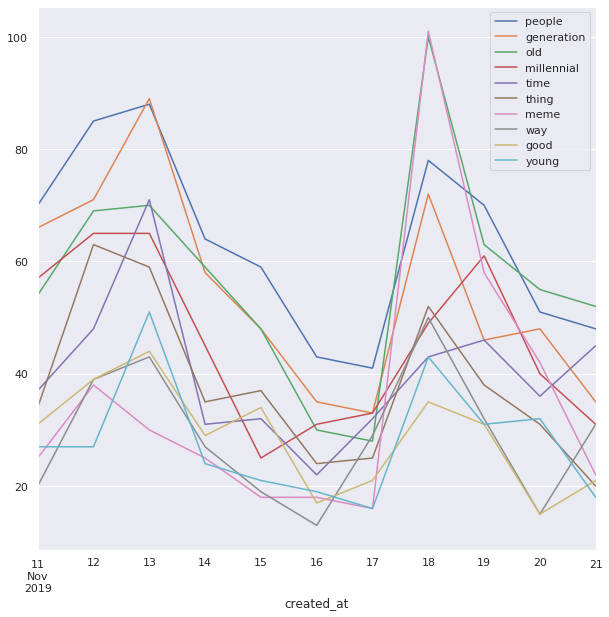

In [242]:
# count up occurence of hashtags in timeframe of interest (resample means 'group by', not part of package already included in Python by default)

tweets_boomer_token.resample('D')[most_common].sum().plot()

## Exercise 4: Supervised ML (NLP)

In [0]:
# Some initial downloads and installs

!wget -O tweet_labels.csv -qq "https://raw.githubusercontent.com/DeepLearnI/trump_tweet_classifier/master/code/tweet_labels.csv"

!pip -q install eli5

In [49]:
!head tweet_labels.csv

tweet,labels
To every one of the HEROES we recognized today — THANK YOU and God Bless You All!pic.twitter.com/JWKwylpdiO,True
"We have been serving as policemen in Afghanistan, and that was not meant to be the job of our Great Soldiers, the finest on earth. Over the last four days, we have been hitting our Enemy harder than at any time in the last ten years!",True
"...the Economy, where there is NO Recession, much to the regret of the LameStream Media! They are working overtime to help the Democrats win in 2020, but that will NEVER HAPPEN, Americans are too smart!",True
"...the look of turmoil in the White House, of which there is none. I view much of the media as simply an arm of the Democrat Party. They are corrupt, and they are extremely upset at how well our Country is doing under MY Leadership, including...",True
"A lot of Fake News is being reported that I overruled the VP and various advisers on a potential Camp David meeting with the Taliban. This Story is False! I always think

In [0]:
# Read in the files

import pandas as pd
pd.set_option('display.max_colwidth', -1) #to see more text

import numpy as np
import seaborn as sns

import itertools
from collections import Counter

tweet_labels_df = pd.read_csv("tweet_labels.csv")

In [70]:
tweet_labels_df.head()

,tweet,labels
0,To every one of the HEROES we recognized today — THANK YOU and God Bless You All!pic.twitter.com/JWKwylpdiO,True
1,"We have been serving as policemen in Afghanistan, and that was not meant to be the job of our Great Soldiers, the finest on earth. Over the last four days, we have been hitting our Enemy harder than at any time in the last ten years!",True
2,"...the Economy, where there is NO Recession, much to the regret of the LameStream Media! They are working overtime to help the Democrats win in 2020, but that will NEVER HAPPEN, Americans are too smart!",True
3,"...the look of turmoil in the White House, of which there is none. I view much of the media as simply an arm of the Democrat Party. They are corrupt, and they are extremely upset at how well our Country is doing under MY Leadership, including...",True
4,"A lot of Fake News is being reported that I overruled the VP and various advisers on a potential Camp David meeting with the Taliban. This Story is False! I always think it is good to meet and talk, but in this case I decided not to. The Dishonest Media likes to create...",True


In [0]:
import preprocessor as p

p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.SMILEY, p.OPT.MENTION)
tweets_clean = tweet_labels_df['tweet'].map(p.clean)

In [0]:
tknzr = TweetTokenizer(strip_handles=True)

tweets_clean = tweets_clean.map(lambda t: [tok.lower() for tok in word_tokenize(t) if tok not in stop_words and tok.isalpha()])

In [0]:
tweets_clean = tweets_clean.map(lambda t: " ".join(t))

## Spacy

In [0]:
tokens = []

for x in nlp.pipe(tweets_clean):
  proj_tok = [token.lemma_.lower() for token in x if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [0]:
tweet_labels_df['tokens'] = tokens

In [108]:
tweet_labels_df.head()

,tweet,labels,tokens
0,To every one of the HEROES we recognized today — THANK YOU and God Bless You All!pic.twitter.com/JWKwylpdiO,True,"[hero, today]"
1,"We have been serving as policemen in Afghanistan, and that was not meant to be the job of our Great Soldiers, the finest on earth. Over the last four days, we have been hitting our Enemy harder than at any time in the last ten years!",True,"[policeman, afghanistan, job, great, soldier, earth, day, enemy, hard, time, year]"
2,"...the Economy, where there is NO Recession, much to the regret of the LameStream Media! They are working overtime to help the Democrats win in 2020, but that will NEVER HAPPEN, Americans are too smart!",True,"[economy, recession, regret, lamestream, medium, overtime, help, democrat, american, smart]"
3,"...the look of turmoil in the White House, of which there is none. I view much of the media as simply an arm of the Democrat Party. They are corrupt, and they are extremely upset at how well our Country is doing under MY Leadership, including...",True,"[turmoil, white, house, medium, simply, democrat, party, extremely, upset, country, leadership]"
4,"A lot of Fake News is being reported that I overruled the VP and various advisers on a potential Camp David meeting with the Taliban. This Story is False! I always think it is good to meet and talk, but in this case I decided not to. The Dishonest Media likes to create...",True,"[lot, fake, news, adviser, potential, camp, david, meeting, story, false, good, meet, talk, case, dishonest, medium, like]"


In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model

from sklearn.model_selection import train_test_split

train_tokens, test_tokens, y_train, y_test = train_test_split(tokens, tweet_labels_df.labels, test_size=0.2)

In [0]:
# Generate a dictionary
dictionary = Dictionary(train_tokens)

In [0]:
# Filter it for extreme stuff
dictionary.filter_extremes(no_below = 10, no_above=0.4)

In [0]:
# construct corpus using this dictionary
train_corpus = [dictionary.doc2bow(doc) for doc in train_tokens]
test_corpus = [dictionary.doc2bow(doc) for doc in test_tokens]

In [0]:
# Tooling to map between corpus (gensim) and matrix - more general
from gensim.matutils import corpus2csc, corpus2dense

In [0]:
X_train = corpus2csc(train_corpus)
X_test = corpus2csc(test_corpus)

In [125]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train.T, y_train)

model.score(X_test.T, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6674267100977199

Attempt with TfidfModel

In [0]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(train_corpus)

In [0]:
train_corpus_tfidf = tfidf[train_corpus]
test_corpus_tfidf = tfidf[test_corpus]

In [0]:
X_train = corpus2csc(train_corpus_tfidf)
X_test = corpus2csc(test_corpus_tfidf)

In [246]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train.T, y_train)

model.score(X_test.T, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6732899022801303